<a href="https://colab.research.google.com/github/nsmsm/ASL/blob/master/3_DNN_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

## train_x : need for learning DNN
## ext_train_x : need for learning CNN
train_x = train_x/255.0
test_x = test_x/255.0

ext_train_x = train_x.reshape((60000, 28, 28, 1))
ext_test_x = test_x.reshape((10000, 28, 28, 1))

## show the dimensions of train_x and ext_train_x
print(train_x.shape)
print(ext_train_x.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
## Define a DNN model and a CNN model
## set the number of params. of DNN and the number of params. of CNN to be similar

## DNN model
dnn_model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(110, activation='relu'),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax')]
)

## CNN model
cnn_model = models.Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

dnn_model.summary()
cnn_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 110)               86350     
_________________________________________________________________
dense_47 (Dense)             (None, 100)               11100     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 98,460
Trainable params: 98,460
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
__________________________

In [ ]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

dnn_hist=dnn_model.fit(train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)
cnn_hist=cnn_model.fit(ext_train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)

Epoch 1/20
540/540 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.8119 - val_loss: 0.4293 - val_accuracy: 0.8507
Epoch 2/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8637 - val_loss: 0.3605 - val_accuracy: 0.8672
Epoch 3/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8757 - val_loss: 0.3577 - val_accuracy: 0.8732
Epoch 4/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3199 - accuracy: 0.8832 - val_loss: 0.3517 - val_accuracy: 0.8765
Epoch 5/20
540/540 [==============================] - 1s 2ms/step - loss: 0.2983 - accuracy: 0.8905 - val_loss: 0.3453 - val_accuracy: 0.8747
Epoch 6/20
540/540 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.8957 - val_loss: 0.3251 - val_accuracy: 0.8750
Epoch 7/20
540/540 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.8978 - val_loss: 0.3317 - val_accuracy: 0.8813
Epoch 

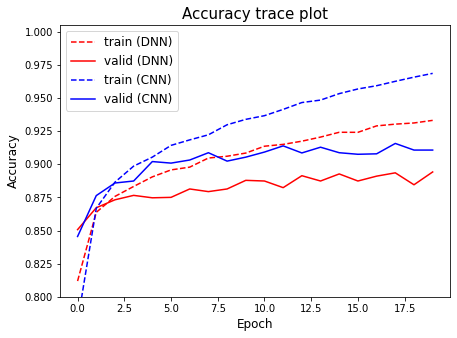

313/313 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.9098
Performance of DNN
...test accuracy: 0.887, test loss: 0.349
Performance of CNN
...test accuracy: 0.910, test loss: 0.338


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(dnn_hist.history['accuracy'], 'r--', label='train (DNN)')
plt.plot(dnn_hist.history['val_accuracy'], 'r-', label='valid (DNN)')
plt.plot(cnn_hist.history['accuracy'], 'b--', label='train (CNN)')
plt.plot(cnn_hist.history['val_accuracy'], 'b-', label='valid (CNN)')
plt.ylim([0.8,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

dnn_sc = dnn_model.evaluate(test_x, test_y)
cnn_sc = cnn_model.evaluate(ext_test_x, test_y)
print('Performance of DNN')
print('...test accuracy: %.3f, test loss: %.3f'%(dnn_sc[1], dnn_sc[0]))
print('Performance of CNN')
print('...test accuracy: %.3f, test loss: %.3f'%(cnn_sc[1], cnn_sc[0]))
